## C-Handling Missing values by Replacing with Previous Value – Forward Fill

In [2]:
import pandas as pd 

In [3]:
df=pd.read_csv('data.csv')
df.head()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,0,-0.354591,-0.464038,2.304115,0.734486,1.696395,0.136285,-0.518344,0.502640,-1.852504,...,3.744152,0.794438,0.265185,-0.561809,0.196480,0.373434,6.206995,3.809505,1.236486,1.182055
1,1,1.380940,-0.499626,-0.418548,1.911725,-0.826130,-1.715371,-0.577091,-1.041486,0.596067,...,-2.895826,-0.738275,2.361818,-0.060753,0.727249,-0.271882,5.232157,-4.218259,-2.724883,-0.063775
2,2,0.256023,-1.059874,NaN,0.345678,1.513814,1.243864,-0.509648,-0.800481,-0.115945,...,2.252834,0.472496,2.491386,0.353381,-0.260682,-0.000833,-0.116457,-2.131747,3.661499,-0.131576
3,3,-0.728420,-2.432399,-2.453602,-0.020509,0.333397,0.086049,-1.787601,0.667011,0.761564,...,2.004600,-4.664806,-0.847211,-0.264249,0.664334,-0.557868,8.499483,-4.738799,-3.054611,0.494152
4,4,0.590212,-0.066127,0.468009,-1.096038,0.119399,-1.809710,0.466358,-0.053196,-0.580320,...,0.976937,2.558883,3.377724,0.846891,0.696032,0.554121,-5.979714,-2.869631,3.733057,-0.722943


In [4]:
df.shape

(1000000, 81)

In [5]:
df.isnull()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

row_id        0
F_1_0     18397
F_1_1     18216
F_1_2     18008
F_1_3     18250
          ...  
F_4_10    18225
F_4_11    18119
F_4_12    18306
F_4_13    17995
F_4_14    18267
Length: 81, dtype: int64

In [7]:
df.isnull().sum().sum()


1000000

In [8]:
df1 = df.sample(frac =.05)
df1.shape

(50000, 81)

In [9]:
import datasist as ds #import datasist library
ds.structdata.describe(df1)

First five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
387428,387428,-0.776038,-0.868982,-1.321273,1.905397,-1.563812,1.086140,0.098307,-0.688044,-1.675091,...,-4.251131,0.777099,0.027415,-0.338996,1.232769,1.480647,-2.130942,0.951509,-3.029424,0.928204
480531,480531,0.683422,-1.050430,-0.264773,0.092728,-0.709941,0.802467,-1.760691,0.220069,0.856627,...,-0.246375,-0.611731,-0.379599,-0.076009,0.092352,0.374293,-2.730457,-0.074692,3.865145,0.137807
599187,599187,-0.534670,-1.337186,1.050525,-0.552650,-0.718942,-0.887239,0.981204,-0.671210,1.130432,...,-0.024049,-0.749953,-0.866168,0.562891,-1.288406,-0.087086,-6.101108,-1.177529,-2.340925,-0.658397
256263,256263,-1.422788,0.408713,-0.670482,-1.066154,-0.733267,0.320349,0.025095,0.274284,-0.603290,...,2.480034,4.028287,0.589467,0.249402,-0.594050,-0.685497,-4.168602,-3.453949,3.950540,0.243442
975123,975123,-1.413716,-0.865604,-0.602273,-0.328325,1.309010,-0.230461,0.859397,0.521121,0.885974,...,-3.065623,-2.037066,-1.855750,1.383677,-1.580891,1.006479,-2.660116,-3.801447,-1.166027,NaN




Random five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
540559,540559,-0.742423,0.411704,NaN,1.791939,1.220996,1.841530,1.033991,-0.746124,0.558482,...,2.513215,-2.847094,-0.402171,-1.389911,-1.625885,-1.344640,6.240839,0.247119,-1.612254,0.821780
971051,971051,-0.825474,1.410736,1.428041,0.235571,-1.164664,0.559254,-1.364828,0.079109,-0.063481,...,-1.129722,-4.980987,-0.989022,-0.209793,-0.372365,-0.252530,-1.234181,-1.319129,-2.325270,0.059211
403523,403523,-1.147943,0.114150,0.180713,0.231341,-0.293258,-0.659653,-0.377806,1.147585,0.332506,...,-8.996852,2.202640,-0.965540,1.148355,1.136882,1.606692,-1.334684,-1.089657,-3.479841,1.804172
955923,955923,0.843876,-0.561684,0.598313,0.078277,-2.324543,-0.025600,-0.621397,0.966516,-0.965347,...,2.900148,1.782548,-4.374345,0.699786,-0.920605,0.089975,-1.802143,3.825322,1.046675,-0.317878
278551,278551,0.335711,-0.780774,-1.391268,-0.060683,-0.395376,0.714340,0.005134,-0.542090,-1.047102,...,-3.562860,-0.203258,-1.736720,-0.224157,-0.274129,0.038581,-1.322958,5.439338,-0.592627,0.203720




Last five data points


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
448246,448246,0.346090,0.440197,-2.005772,0.421348,-0.863621,0.064274,-0.932274,0.122904,0.282836,...,2.314125,1.267604,-0.087345,-0.036418,-0.972826,-0.814608,0.041452,-4.175960,-1.587988,-0.623961
167784,167784,1.855243,0.348454,-1.090857,-0.497907,1.327291,0.473682,0.117879,0.741131,0.074465,...,-0.578067,0.902495,1.316139,0.048134,0.780563,-0.454640,-4.006342,2.560475,2.590750,-0.702279
853393,853393,-1.225101,1.085054,-0.162648,0.336214,-0.761240,-0.732986,0.774699,-0.506011,-0.861484,...,0.900192,-0.654077,2.956730,-2.494949,-0.279188,-0.416516,13.845471,-1.799967,-0.388207,1.109429
270919,270919,NaN,0.125380,1.484520,-0.622615,-0.765441,0.986819,-0.846581,0.144331,-0.949006,...,-0.990190,-1.426780,4.584428,0.038791,-0.748381,-0.868187,-3.504482,-2.038832,2.245346,-0.687753
612491,612491,0.253033,0.461842,-0.593030,0.161805,1.765556,2.141603,-0.964282,-0.458034,-0.844440,...,-1.258240,-1.539172,3.519253,-1.366611,-0.265704,-0.235741,6.484000,1.288863,-3.159865,0.901548




Shape of  data set: (50000, 81)


Size of  data set: 4050000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
row_id,int64
F_1_0,float64
F_1_1,float64
F_1_2,float64
F_1_3,float64
...,...
F_4_10,float64
F_4_11,float64
F_4_12,float64
F_4_13,float64




Numerical Features in Data set
['row_id', 'F_1_0', 'F_1_1', 'F_1_2', 'F_1_3', 'F_1_4', 'F_1_5', 'F_1_6', 'F_1_7', 'F_1_8', 'F_1_9', 'F_1_10', 'F_1_11', 'F_1_12', 'F_1_13', 'F_1_14', 'F_2_0', 'F_2_1', 'F_2_2', 'F_2_3', 'F_2_4', 'F_2_5', 'F_2_6', 'F_2_7', 'F_2_8', 'F_2_9', 'F_2_10', 'F_2_11', 'F_2_12', 'F_2_13', 'F_2_14', 'F_2_15', 'F_2_16', 'F_2_17', 'F_2_18', 'F_2_19', 'F_2_20', 'F_2_21', 'F_2_22', 'F_2_23', 'F_2_24', 'F_3_0', 'F_3_1', 'F_3_2', 'F_3_3', 'F_3_4', 'F_3_5', 'F_3_6', 'F_3_7', 'F_3_8', 'F_3_9', 'F_3_10', 'F_3_11', 'F_3_12', 'F_3_13', 'F_3_14', 'F_3_15', 'F_3_16', 'F_3_17', 'F_3_18', 'F_3_19', 'F_3_20', 'F_3_21', 'F_3_22', 'F_3_23', 'F_3_24', 'F_4_0', 'F_4_1', 'F_4_2', 'F_4_3', 'F_4_4', 'F_4_5', 'F_4_6', 'F_4_7', 'F_4_8', 'F_4_9', 'F_4_10', 'F_4_11', 'F_4_12', 'F_4_13', 'F_4_14']


Categorical Features in Data set


[]



Statistical Description of Columns


,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.00000,49124.000000,49074.000000,49087.000000,49107.000000,49060.000000,49119.000000,49098.000000,49155.000000,49142.000000,...,49099.000000,49099.000000,49118.000000,49077.000000,49130.000000,49143.000000,49103.000000,49140.000000,49059.000000,49043.000000
mean,499047.16552,0.005628,0.003580,0.002909,0.004218,-0.005703,0.003197,0.001355,-0.063582,0.000719,...,0.355530,0.015760,0.339879,-0.065918,-0.082319,0.038626,0.532765,0.327611,0.345197,0.034116
std,288514.84506,1.003757,1.006566,1.005716,0.999295,1.004227,0.998690,1.003072,0.727333,1.002216,...,2.353413,2.275699,2.360403,0.780095,0.806569,0.704526,5.011180,2.390553,2.363808,0.774698
min,2.00000,-4.054866,-4.176846,-4.496883,-4.185839,-4.465097,-3.852764,-4.338878,-5.400245,-4.254039,...,-8.996852,-8.833187,-9.048430,-8.558766,-5.350994,-4.580837,-23.595724,-10.583340,-8.530449,-6.042153
25%,247647.00000,-0.676023,-0.674875,-0.674198,-0.670160,-0.684327,-0.670611,-0.672343,-0.496620,-0.676698,...,-1.250341,-1.548212,-1.235745,-0.513667,-0.577724,-0.386043,-2.816556,-1.284765,-1.291888,-0.398338
50%,498656.50000,0.005831,0.003814,-0.000505,-0.002673,-0.007981,0.001554,0.000117,0.005592,0.002144,...,0.334270,-0.059626,0.401528,0.026235,-0.028396,0.102289,0.166472,0.344750,0.311001,0.127333
75%,748173.50000,0.684992,0.684128,0.677694,0.675311,0.669627,0.674071,0.675400,0.442493,0.674429,...,1.933933,1.516325,1.939071,0.482030,0.476455,0.528588,3.629562,1.951472,1.939393,0.566366
max,999973.00000,4.114598,3.965547,4.099916,3.824963,4.819838,4.078192,4.054421,2.269626,4.382044,...,10.174436,9.754823,10.281500,2.282734,2.313497,2.327079,23.516170,11.235084,9.762989,2.328411




Description of Categorical Features


C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:
C:\Users\PC\anaconda3\lib\site-packages\datasist\structdata.py:81: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if len(date_cols) is not 0:


ValueError: No objects to concatenate

In [10]:
ds.structdata.display_missing(df1)

,features,missing_counts,missing_percent
0,row_id,0,0.0
1,F_1_0,876,1.8
2,F_1_1,926,1.9
3,F_1_2,913,1.8
4,F_1_3,893,1.8
...,...,...,...
76,F_4_10,857,1.7
77,F_4_11,897,1.8
78,F_4_12,860,1.7
79,F_4_13,941,1.9


In [11]:
import matplotlib.pyplot as plt
ds.visualizations.countplot(df1)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


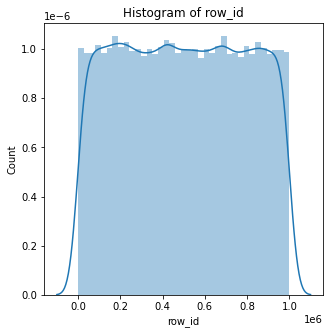

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


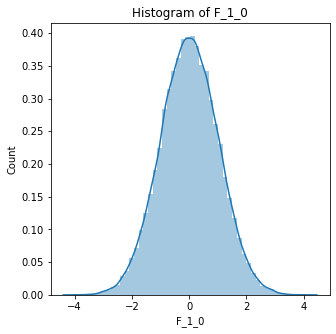

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


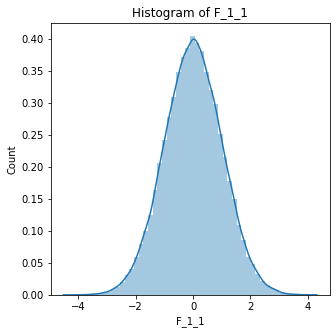

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


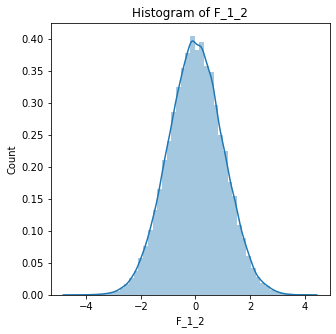

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


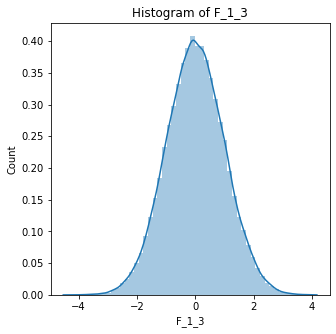

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


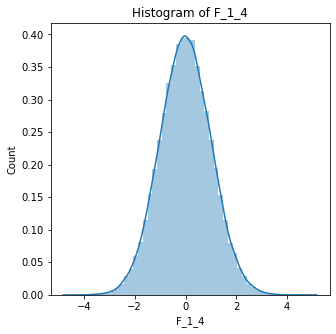

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


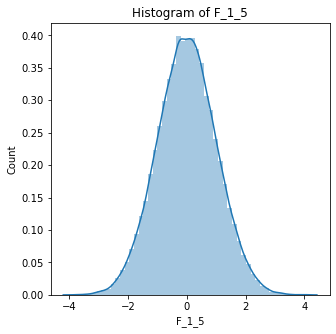

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


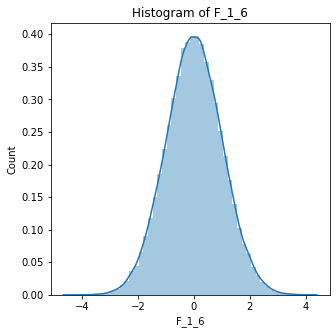

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


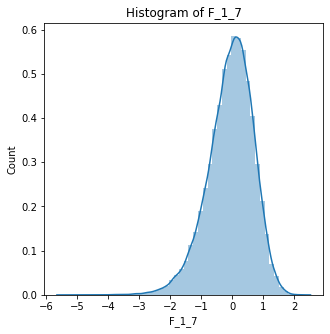

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


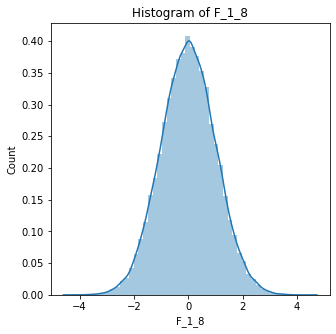

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


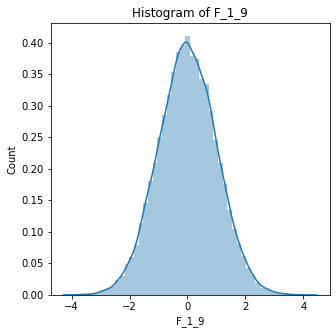

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


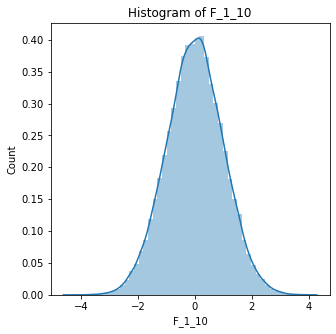

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


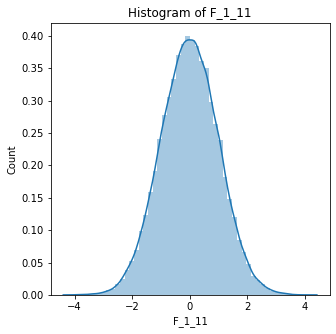

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


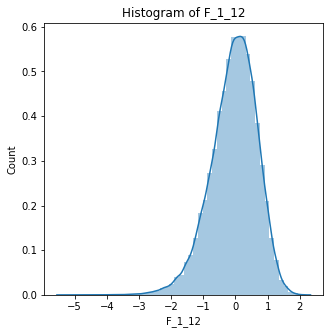

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


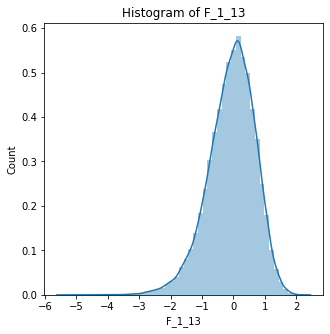

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


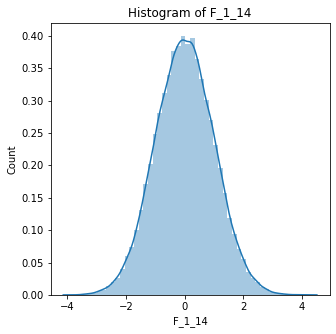

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


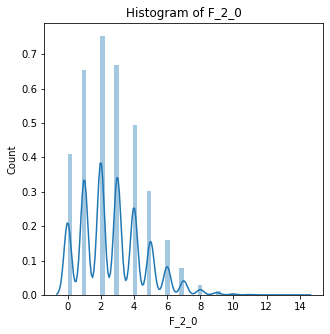

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


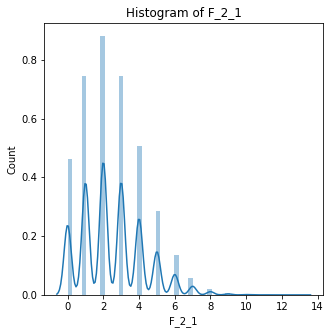

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


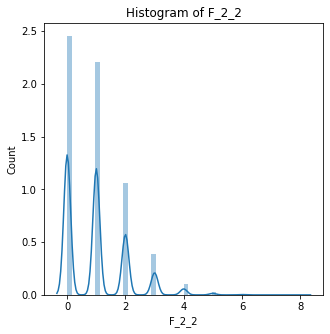

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


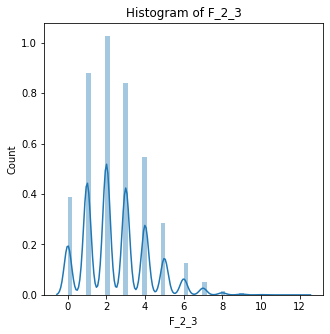

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


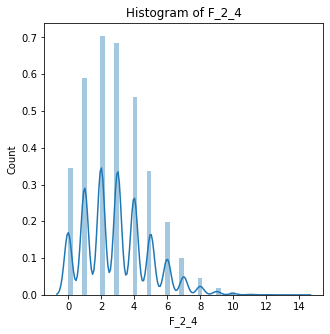

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


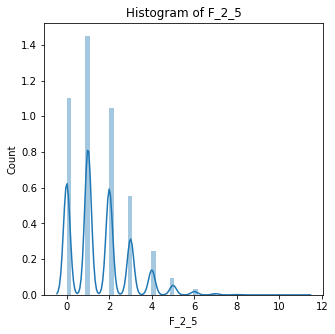

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


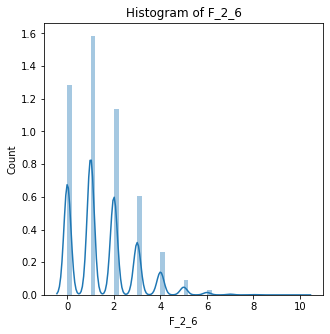

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


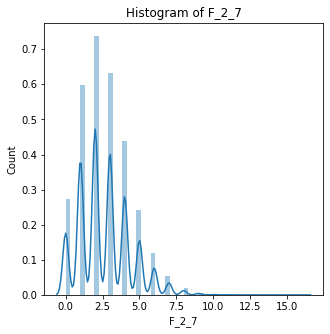

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


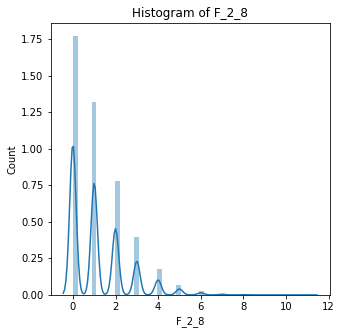

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


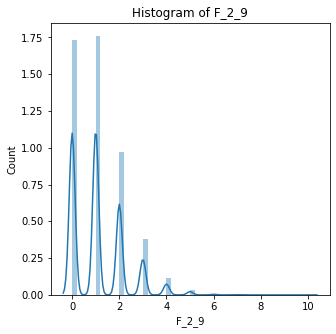

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


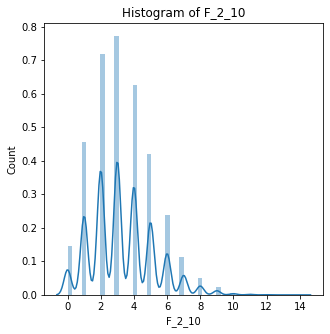

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


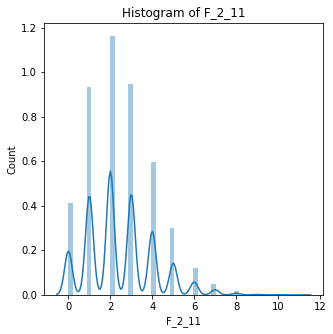

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


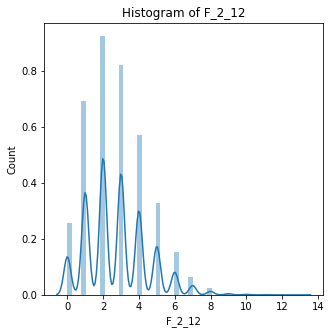

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


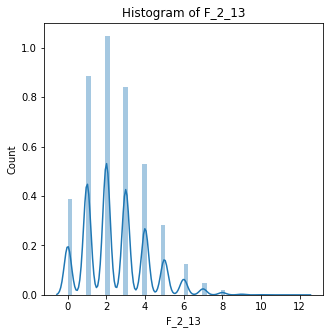

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


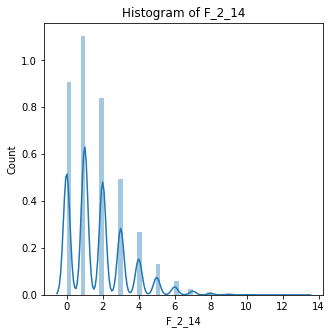

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


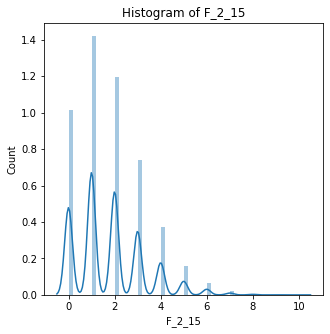

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


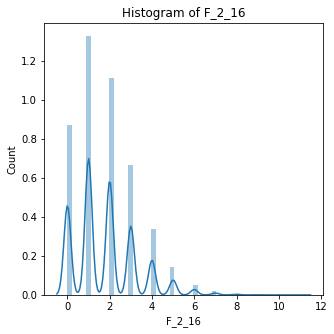

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


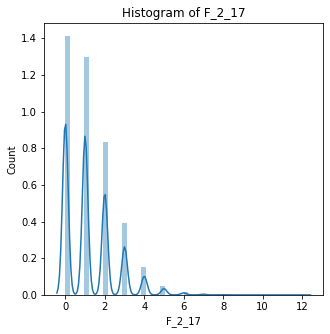

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


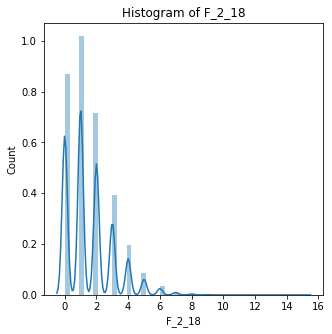

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


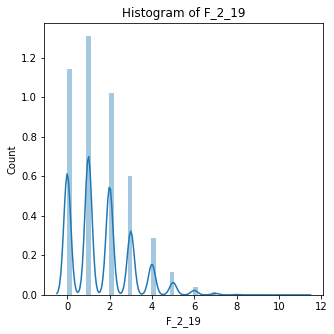

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


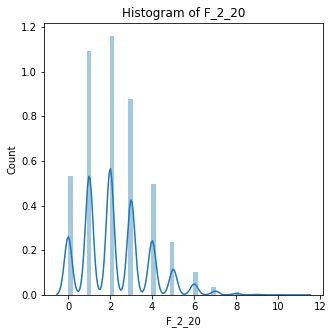

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


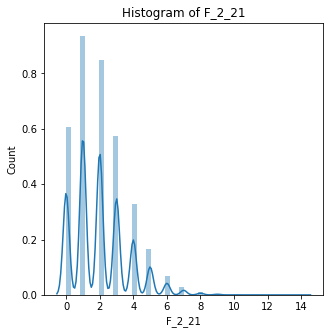

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


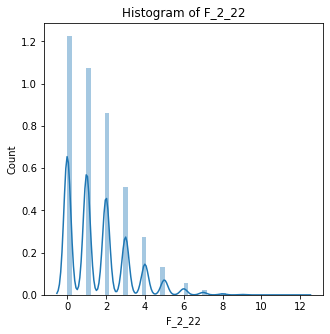

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


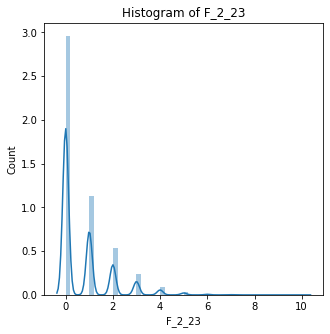

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


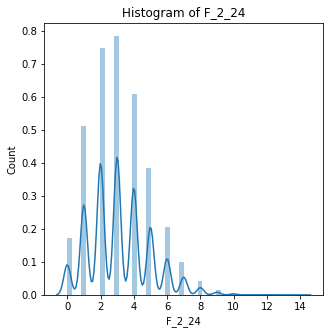

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


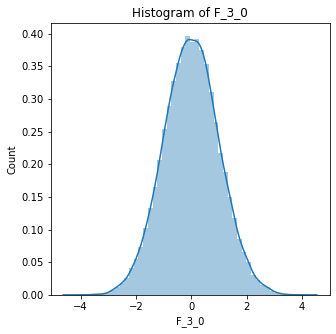

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


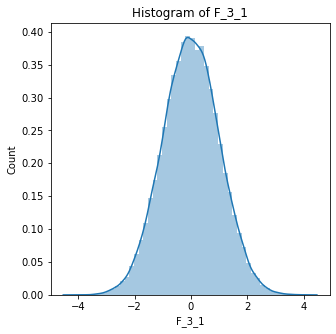

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


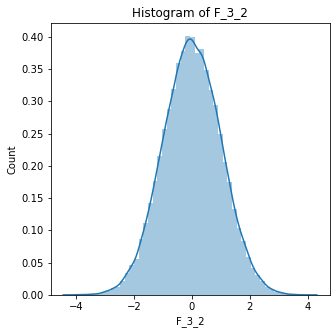

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


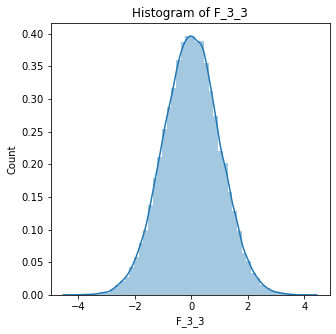

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


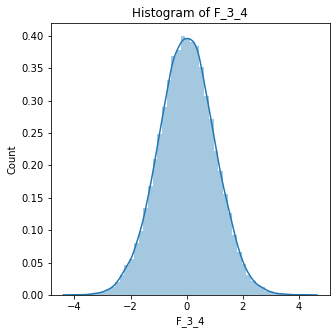

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


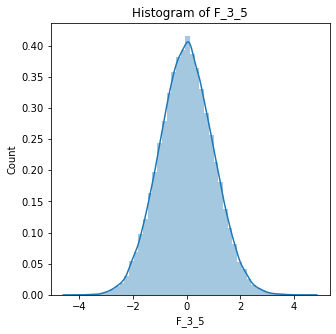

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


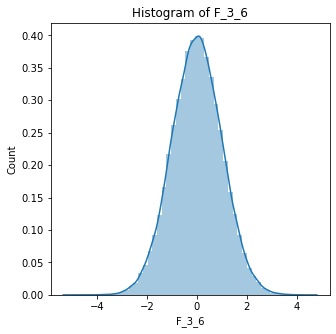

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


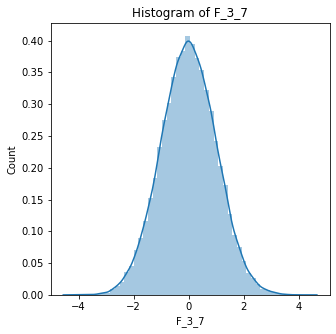

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


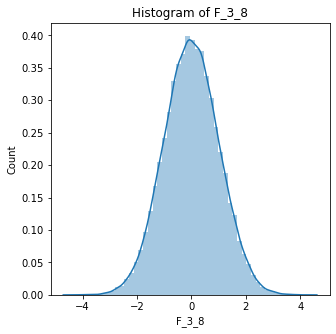

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


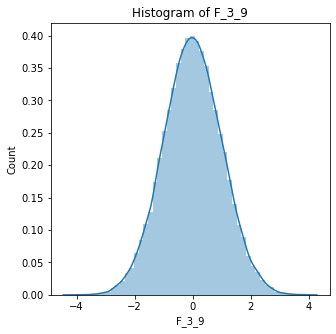

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


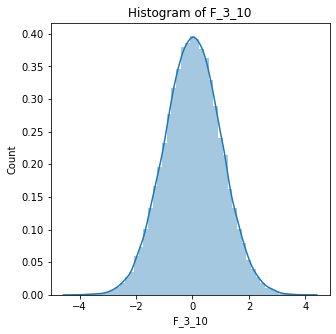

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


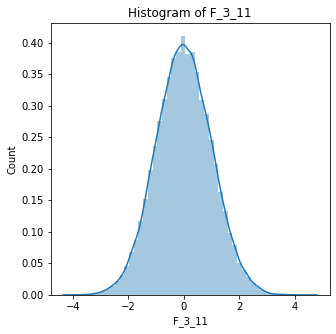

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


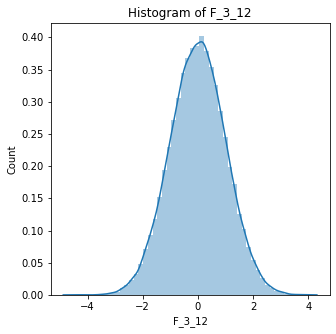

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


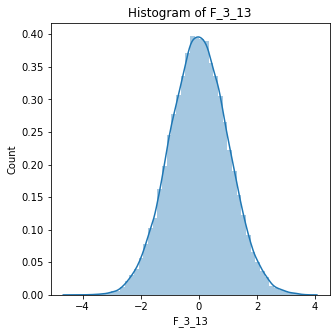

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


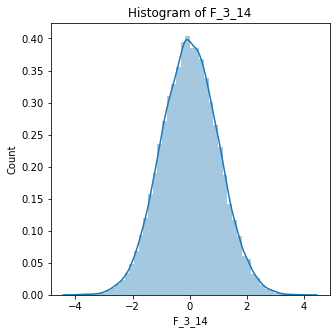

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


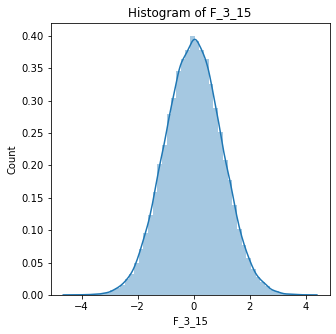

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


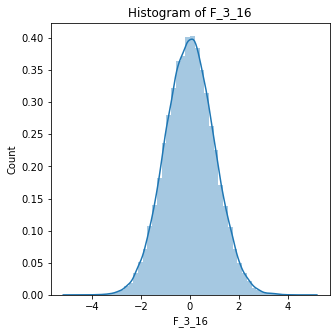

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


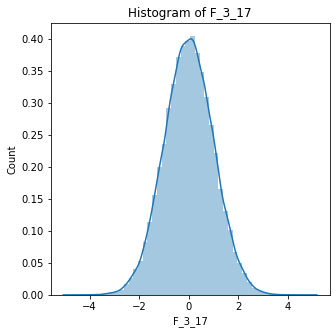

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


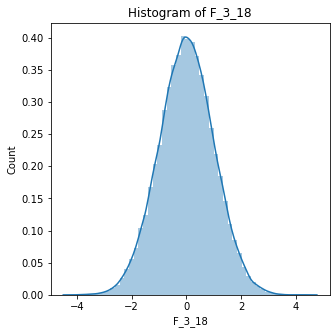

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


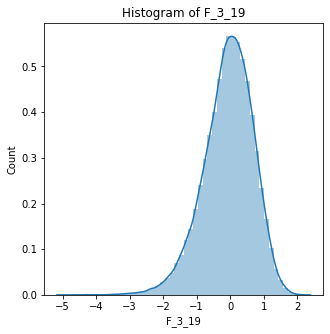

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


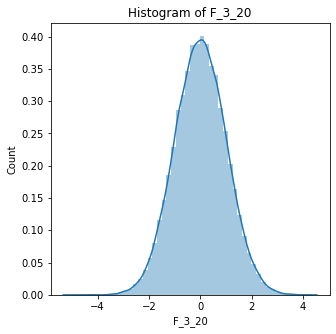

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


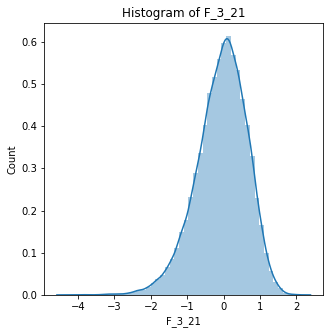

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


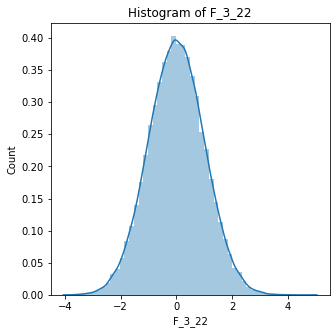

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


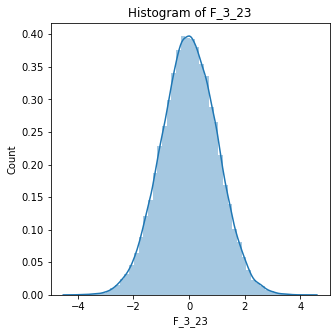

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


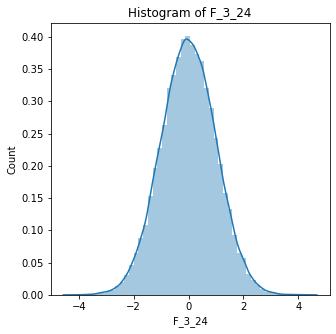

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


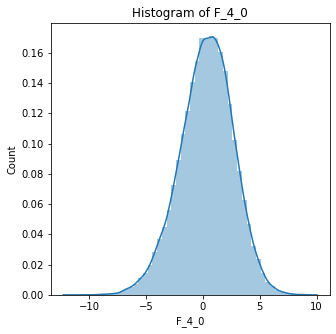

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


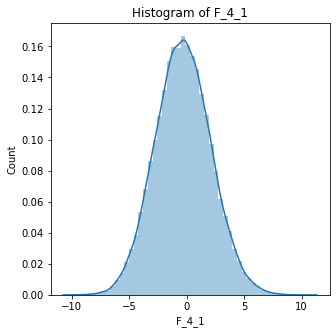

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


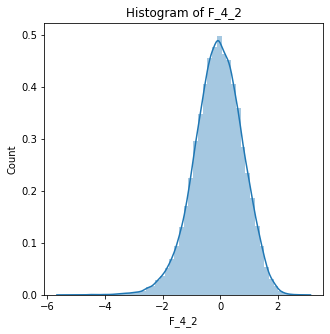

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


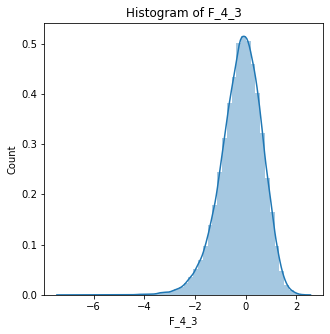

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


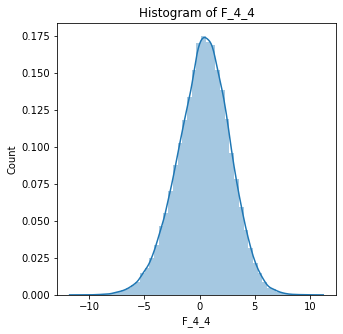

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


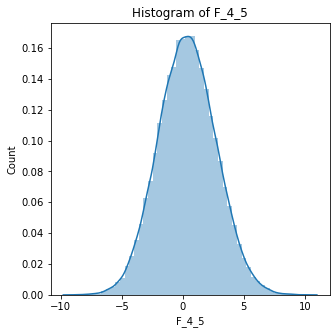

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


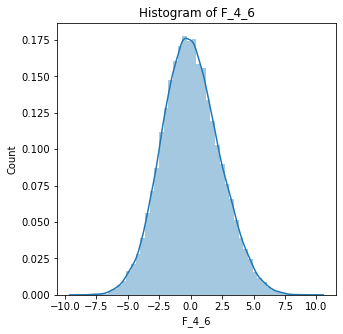

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


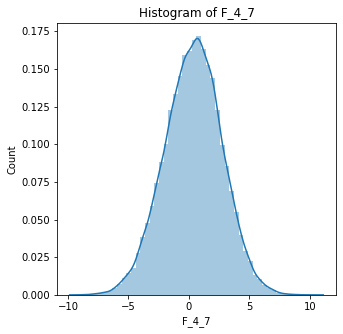

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


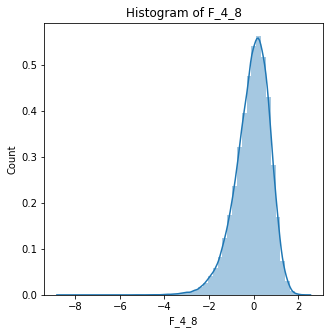

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


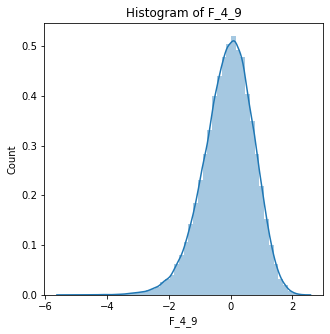

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


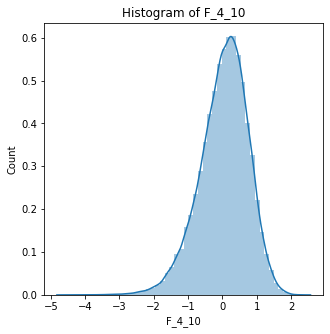

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


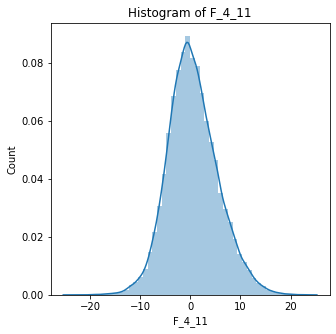

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


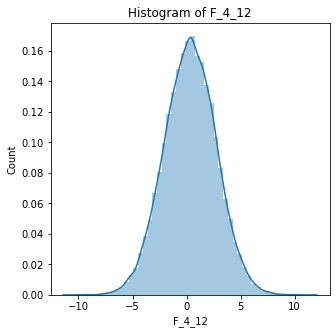

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


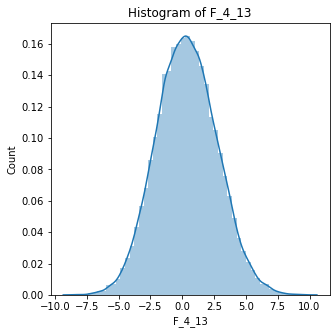

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


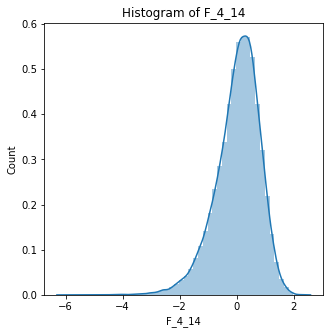

In [12]:
ds.visualizations.histogram(df1)

In [12]:
df1.isnull().sum()

row_id      0
F_1_0     866
F_1_1     912
F_1_2     896
F_1_3     984
         ... 
F_4_10    919
F_4_11    940
F_4_12    902
F_4_13    870
F_4_14    854
Length: 81, dtype: int64

In [13]:
df1.isnull().sum().sum()

49827

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 215715 to 691406
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  50000 non-null  int64  
 1   F_1_0   49134 non-null  float64
 2   F_1_1   49088 non-null  float64
 3   F_1_2   49104 non-null  float64
 4   F_1_3   49016 non-null  float64
 5   F_1_4   49086 non-null  float64
 6   F_1_5   49059 non-null  float64
 7   F_1_6   49137 non-null  float64
 8   F_1_7   49099 non-null  float64
 9   F_1_8   49112 non-null  float64
 10  F_1_9   49123 non-null  float64
 11  F_1_10  49106 non-null  float64
 12  F_1_11  49081 non-null  float64
 13  F_1_12  49189 non-null  float64
 14  F_1_13  49059 non-null  float64
 15  F_1_14  49116 non-null  float64
 16  F_2_0   50000 non-null  int64  
 17  F_2_1   50000 non-null  int64  
 18  F_2_2   50000 non-null  int64  
 19  F_2_3   50000 non-null  int64  
 20  F_2_4   50000 non-null  int64  
 21  F_2_5   50000 non-null  int64

In [13]:
df1.describe()

,row_id,F_1_0,F_1_1,F_1_2,F_1_3,F_1_4,F_1_5,F_1_6,F_1_7,F_1_8,...,F_4_5,F_4_6,F_4_7,F_4_8,F_4_9,F_4_10,F_4_11,F_4_12,F_4_13,F_4_14
count,50000.00000,49124.000000,49074.000000,49087.000000,49107.000000,49060.000000,49119.000000,49098.000000,49155.000000,49142.000000,...,49099.000000,49099.000000,49118.000000,49077.000000,49130.000000,49143.000000,49103.000000,49140.000000,49059.000000,49043.000000
mean,499047.16552,0.005628,0.003580,0.002909,0.004218,-0.005703,0.003197,0.001355,-0.063582,0.000719,...,0.355530,0.015760,0.339879,-0.065918,-0.082319,0.038626,0.532765,0.327611,0.345197,0.034116
std,288514.84506,1.003757,1.006566,1.005716,0.999295,1.004227,0.998690,1.003072,0.727333,1.002216,...,2.353413,2.275699,2.360403,0.780095,0.806569,0.704526,5.011180,2.390553,2.363808,0.774698
min,2.00000,-4.054866,-4.176846,-4.496883,-4.185839,-4.465097,-3.852764,-4.338878,-5.400245,-4.254039,...,-8.996852,-8.833187,-9.048430,-8.558766,-5.350994,-4.580837,-23.595724,-10.583340,-8.530449,-6.042153
25%,247647.00000,-0.676023,-0.674875,-0.674198,-0.670160,-0.684327,-0.670611,-0.672343,-0.496620,-0.676698,...,-1.250341,-1.548212,-1.235745,-0.513667,-0.577724,-0.386043,-2.816556,-1.284765,-1.291888,-0.398338
50%,498656.50000,0.005831,0.003814,-0.000505,-0.002673,-0.007981,0.001554,0.000117,0.005592,0.002144,...,0.334270,-0.059626,0.401528,0.026235,-0.028396,0.102289,0.166472,0.344750,0.311001,0.127333
75%,748173.50000,0.684992,0.684128,0.677694,0.675311,0.669627,0.674071,0.675400,0.442493,0.674429,...,1.933933,1.516325,1.939071,0.482030,0.476455,0.528588,3.629562,1.951472,1.939393,0.566366
max,999973.00000,4.114598,3.965547,4.099916,3.824963,4.819838,4.078192,4.054421,2.269626,4.382044,...,10.174436,9.754823,10.281500,2.282734,2.313497,2.327079,23.516170,11.235084,9.762989,2.328411


<AxesSubplot:>

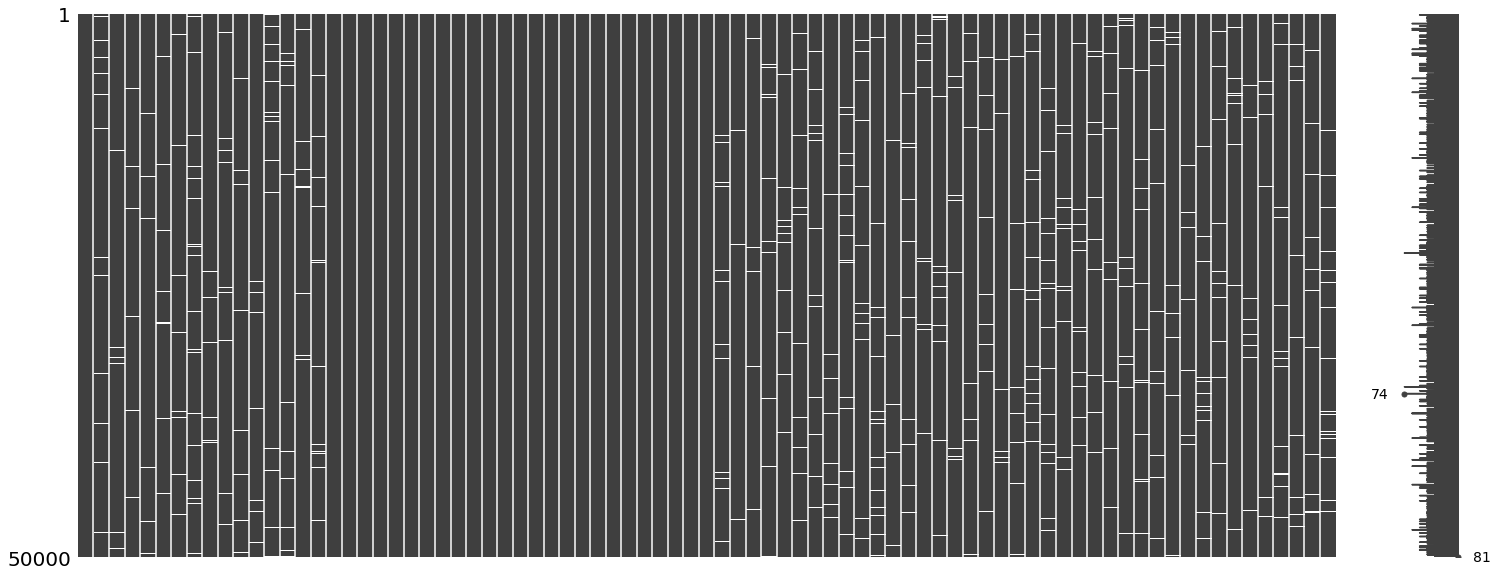

In [14]:
import missingno as msno
%matplotlib inline
msno.matrix(df1)


## C-Handling Missing values by Replacing with Previous Value – Forward Fill

In [15]:
df4=df1.fillna(method='pad')

In [16]:
df4.isnull().sum()

row_id    0
F_1_0     0
F_1_1     0
F_1_2     0
F_1_3     0
         ..
F_4_10    0
F_4_11    0
F_4_12    0
F_4_13    0
F_4_14    0
Length: 81, dtype: int64

<AxesSubplot:>

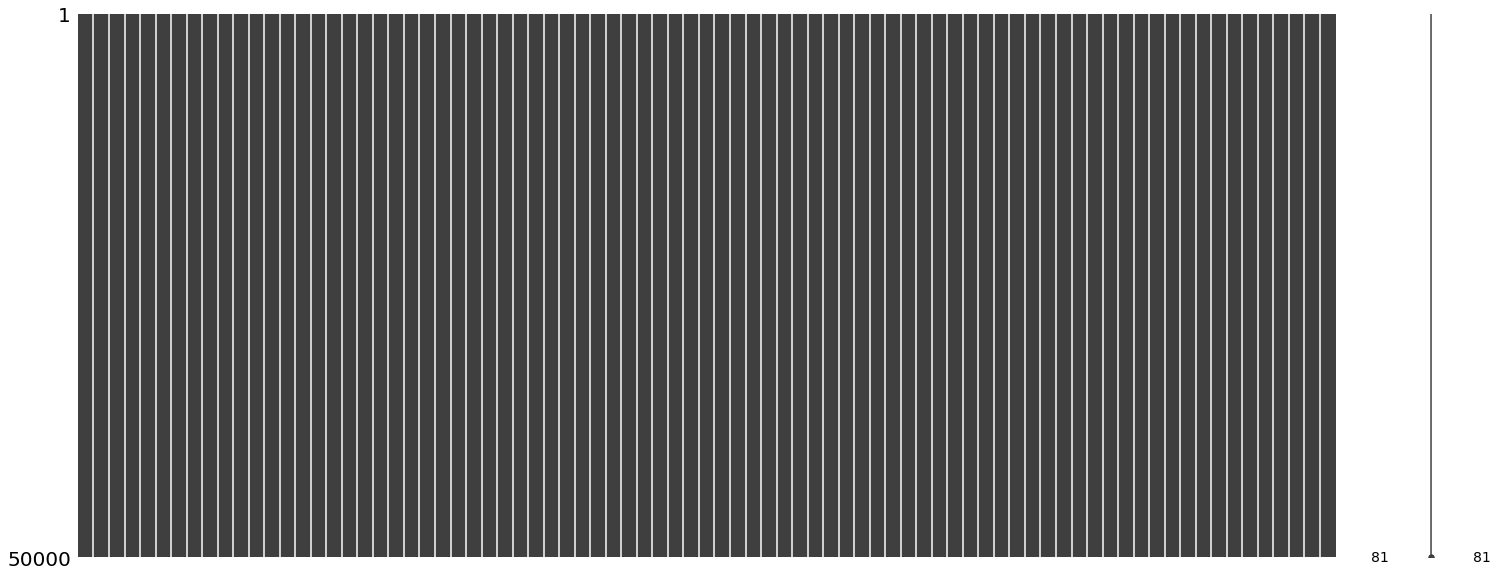

In [17]:
df4.isnull().sum().sum()
import missingno as msno
%matplotlib inline
msno.matrix(df4)

In [18]:
X=df4.iloc[:,1:-1].values
y=df4.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [20]:
print(X.shape)

(50000, 79)


In [21]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

continuous


In [22]:
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train= label_encoder.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))

continuous
multiclass


## 1- Decision Tree for  Replacing with Previous Value – Forward Fill

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,y_train)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
tree.fit(X_train,y_train)

In [ ]:
print('The accuracy of Decision Tree: ',tree.score(X_train,y_train))

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=tree.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Decision Tree")
plt.scatter(y_test,prediction)
plt.plot([-6,10],[-6,40000],color='red')
plt.show()  

## 2- Random Forest for Replacing with Previous Value – Forward Fill

In [92]:
from sklearn.ensemble import RandomForestClassifier
forst=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
forst.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print('The accuracy of Random Forest : ',forst.score(X_train,y_train))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
forst.fit(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
prediction=forst.predict(X_test)

In [ ]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest")
plt.scatter(y_test,prediction)
plt.plot([-6,5],[-10000,20000],color='red')
plt.show()

## 3- Linear Regression for Replacing with Previous Value – Forward Fill

In [23]:
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()
Lin.fit(X_train,y_train)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Lin.fit(X_train,y_train)

LinearRegression()

In [24]:
print('The accuracy of LinearRegression: ',Lin.score(X_train,y_train))

The accuracy of LinearRegression:  0.6157136321893599


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
Lin.intercept_

19536.775575

In [27]:
prediction=Lin.predict(X_test)

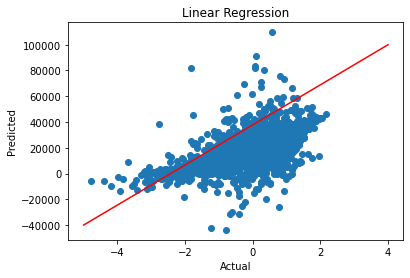

In [32]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Linear Regression")
plt.scatter(y_test,prediction)
plt.plot([-5,4],[-40000,100000],color='red')
plt.show()